In [1]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

# Load the pre-trained VGG model without the top (fully connected) layers
base_model = VGG16(weights=None, include_top=True, input_shape=(224, 224, 3))

# Create a new model with the VGG base model's input and output
vgg = Model(inputs=base_model.input, outputs=base_model.output)

# Load weights from the H5 file
vgg.load_weights('/kaggle/input/vgg16-weights-tf-keras-with-top/vgg16_weights_tf_dim_ordering_tf_kernels.h5')

2024-03-14 08:18:17.786317: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-14 08:18:17.786468: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-14 08:18:17.942990: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [8]:
import os

fracture = np.zeros(1000)
for dirname, _, filenames in os.walk('/kaggle/input/fracatlas/FracAtlas/images/Fractured'):
    for filename in filenames:
        img_path  = os.path.join(dirname,filename)
        img = image.load_img(img_path, target_size=(224, 224,3))
        x_img = image.img_to_array(img)
        x_img = np.expand_dims(x_img, axis=0)
        x_imp = preprocess_input(x_img)
        features = vgg.predict(x_img)[0]
        fracture_out = np.add(fracture, features)
        fracture = fracture_out

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
fracture.shape

(1000,)

In [12]:
sum(fracture)

717.0000027337607

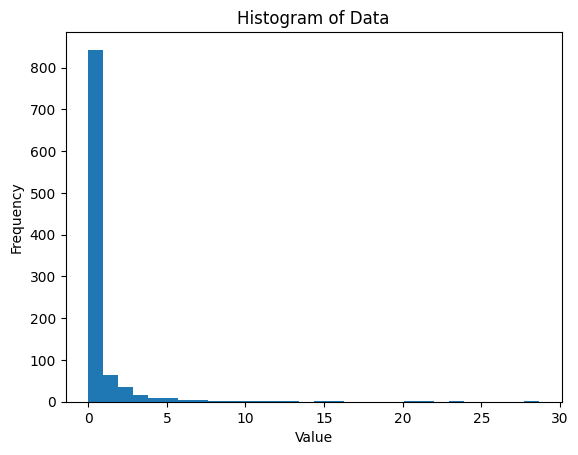

In [11]:
import matplotlib.pyplot as plt

plt.hist(fracture, bins=30)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

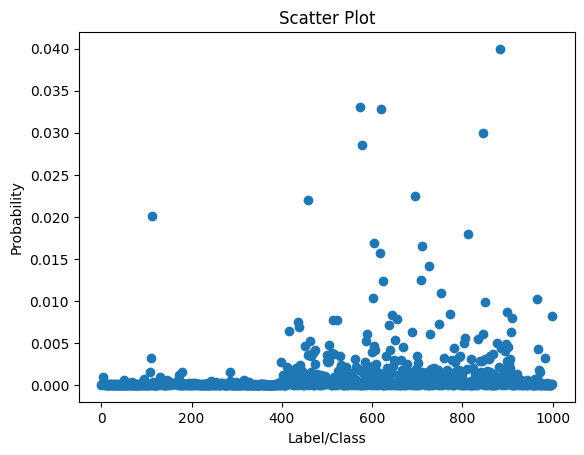

In [14]:
plt.scatter(np.arange(1000), fracture/sum(fracture))
plt.xlabel('Label/Class')
plt.ylabel('Probability')
plt.title('Scatter Plot')
plt.show()

In [18]:
np.save('fracture_prob.npy', fracture)

In [ ]:
# loaded_fracture = np.load('fracture_prob.npy')